In [11]:
%load_ext kedro.ipython
%reload_kedro
context.catalog.list()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[09/15/24 08:42:31] INFO     Resolved project path as:                                              ]8;id=851934;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=738285;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro project goodreads-predictor                                      ]8;id=352175;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=389535;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=470879;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=503360;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=923494;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=105841;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\


[
    'books_raw',
    'books_loaded',
    'publisher_consolidation',
    'price_by_isbn_input',
    'price_by_isbn',
    'book_genres',
    'title_embeddings_original',
    'authors_embeddings',
    'description_embeddings',
    'open_library_book_api_info_input',
    'open_library_book_api_info',
    'filtered_books',
    'exclusions_summary',
    'scope_waterfall_plot',
    'books_features',
    'feature_cutoffs',
    'factor_lumper',
    'model_train',
    'model_valid',
    'model_test',
    'flaml_model_trained',
    'flaml_model_test_results',
    'flaml_regressor_scatterplot',
    'all_model_results',
    'parameters',
    'params:FEATURES',
    'params:TARGET',
    'params:model_config',
    'params:model_config.time_budget',
    'params:model_config.metric',
    'params:model_config.task',
    'params:model_config.estimator_list',
    'params:title_column',
    'params:author_column',
    'params:description_column',
    'params:original_data_key_column',
    'params:experim

In [12]:
df = catalog.load('books_features')

                    INFO     Loading data from books_features (ParquetDataset)...               ]8;id=281889;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=108242;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [13]:
df

,title,isbn,isbn13_x,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,cluster,UMAP1,UMAP2,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,5,14.060379,1.496109,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,3,9.052225,6.735559,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,0,12.680984,-2.407298,0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,3,11.028986,6.481936,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,7,8.010313,9.247348,0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,1,10.034228,10.663538,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,8,11.563412,1.433100,0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,8,14.088162,2.859336,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,9,10.230361,13.722033,0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

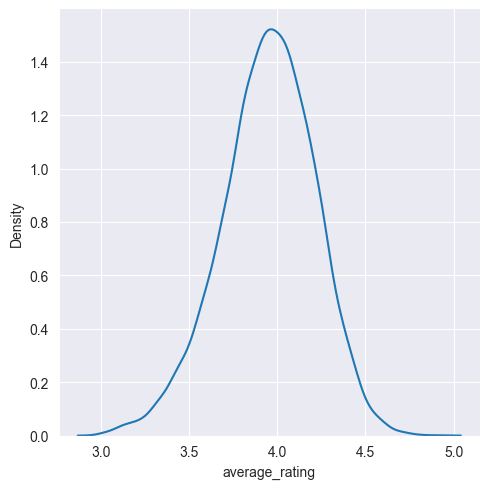

In [15]:
# Visualize quantile of average_rating column
sns.set_style('darkgrid')
sns.displot(data=df, x='average_rating', kind='kde')
plt.show()


In [16]:
# Compute quartiles of df.average_rating
quartiles = df.average_rating.quantile([0.25, 0.5, 0.75])
quartiles



0.25    3.78
0.50    3.96
0.75    4.13
Name: average_rating, dtype: float64

In [19]:
# Use quartiles as thresholds to convert the continuous variable to a categorical one
# Create a new column with the categorical variable using the pd.qcut() function
df['rating_cat'] = pd.qcut(df['average_rating'], q=3, labels=[1, 2, 3,])




In [20]:
df

,title,isbn,isbn13_x,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,UMAP1,UMAP2,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level,rating_cat
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,14.060379,1.496109,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,3
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,9.052225,6.735559,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,1
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,12.680984,-2.407298,0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers,3
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,11.028986,6.481936,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers,2
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,8.010313,9.247348,0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,10.034228,10.663538,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers,3
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,11.563412,1.433100,0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers,2
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,14.088162,2.859336,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,3
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,10.230361,13.722033,0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,3


In [27]:
# Drop the 'average_rating' column
df = df.drop('average_rating', axis=1)

In [32]:
from goodreads_predictor.pipelines.model_data_creation.nodes import create_train_test_split, create_factor_lumper, apply_factor_lumping



In [33]:
train, valid, test = create_train_test_split(df,target_col='rating_cat',test_size=0.2)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 train, valid, test = create_train_test_split(df,target_col='rating_cat',test_size=0.2)       │
│   2                                                                                              │
│                                                                                                  │
│ C:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor\src\goodreads_predictor\pipel │
│ ines\model_data_creation\nodes.py:46 in create_train_test_split                                  │
│                                                                                                  │
│    43 │   │   tuple: A tuple containing train and test DataFrames.                               │
│    44 │   """                                                                                    │
│    45 │   if not isinstance(data[target_col][0], str):                                           │
│ ❱  46 │   │   data['stratify_col'] = data[target_col] > data[target_col].median()                │
│    47 │   else:                                                                                  │
│    48 │   │   data['stratify_col'] = data[target_col]                                            │
│    49                                                                                            │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\series.py:6559 in median      │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\generic.py:12431 in median    │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\generic.py:12377 in           │
│ _stat_function                                                                                   │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\series.py:6443 in _reduce     │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\arrays\categorical.py:2359 in │
│ _reduce                                                                                          │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\pandas\core\arrays\base.py:1954 in        │
│ _reduce                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [ ]:
factor_lumper = create_factor_lumper(threshold=30, is_top_n=False, is_percentage=False)


In [ ]:
train, valid, test, fitted_factor_lumper = apply_factor_lumping(train_data=train, valid_data=valid, test_data=test, factor_lumper=factor_lumper)
